In [102]:
import yfinance as yf
import matplotlib.pyplot as plt
import xgboost as xgb

In [104]:
# Retrieve Bitcoin historical data
btc_prices = yf.download('BTC-USD', start='2016-10-01', end='2023-05-31')

# Print the Bitcoin data
btc_prices

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-01,609.929016,615.237000,609.929016,613.982971,613.982971,56357000
2016-10-02,613.947998,614.005005,609.682007,610.892029,610.892029,39249800
2016-10-03,610.968018,612.567993,610.455017,612.132996,612.132996,46798300
2016-10-04,612.052002,612.054016,609.479004,610.203979,610.203979,49801600
2016-10-05,610.218018,613.814026,609.617004,612.510986,612.510986,68077504
...,...,...,...,...,...,...
2023-05-26,26474.181641,26916.669922,26343.949219,26719.291016,26719.291016,12711619225
2023-05-27,26720.181641,26888.882812,26621.140625,26868.353516,26868.353516,7892015141
2023-05-28,26871.158203,28193.449219,26802.751953,28085.646484,28085.646484,14545229578


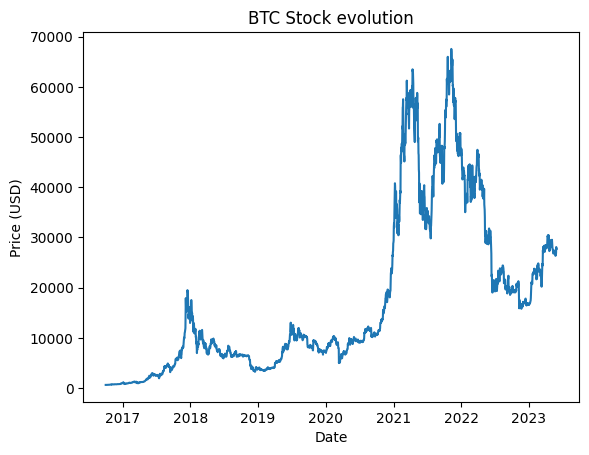

In [105]:
plt.figure()
plt.plot(btc_prices.index, btc_prices["Close"])
plt.title("BTC Stock evolution")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

In [106]:
# Split the data into training and testing datasets
train_size = int(0.9 * len(btc_prices))  # 80% pour l'entraînement
train_data = btc_prices[:train_size]
test_data = btc_prices[train_size:]

In [108]:
# Define input and target variables
input = ["Open", "Volume"]
target = ["Close"]

In [109]:
# Set the model
btc_predictor = xgb.XGBRegressor()
# Train the model
btc_predictor.fit(train_data[input], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [110]:
# Prediction on the test dataset
btc_prediction = btc_predictor.predict(test_data[input])

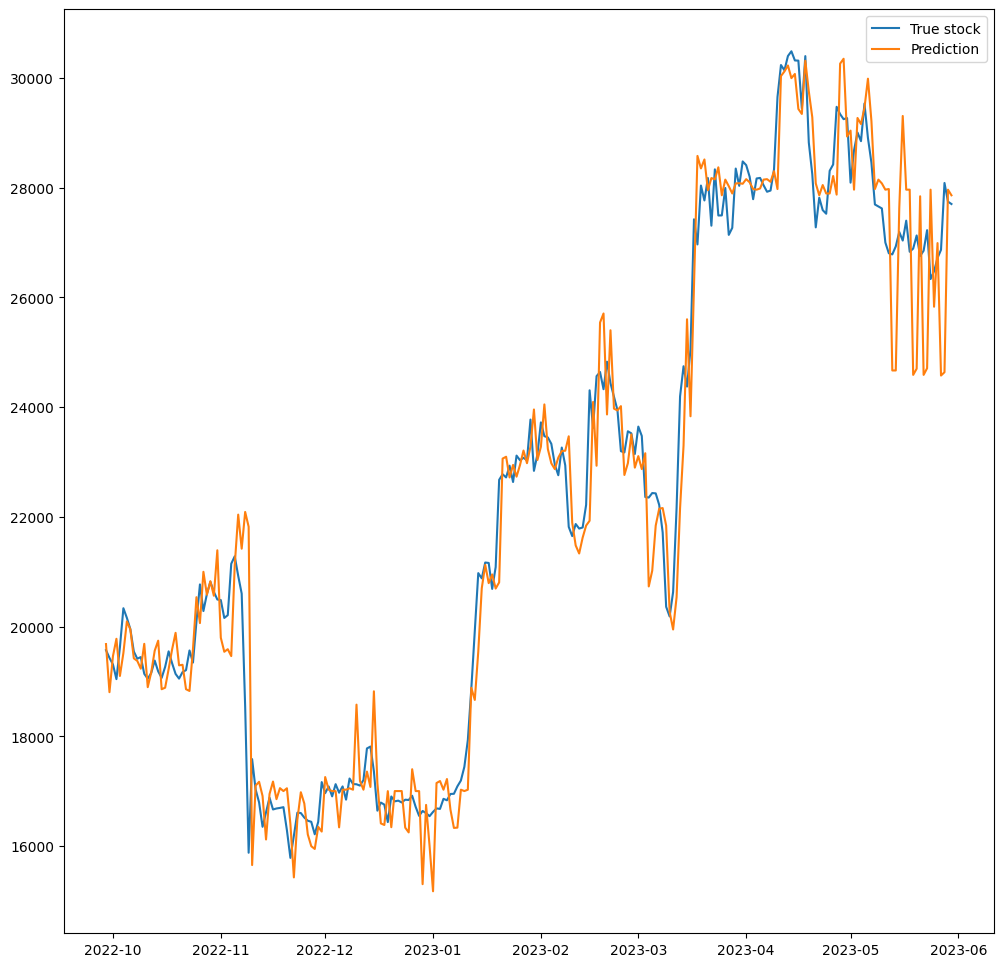

In [117]:
plt.figure(figsize=(12, 12))
plt.plot(test_data.index, test_data[target], label='True stock')
plt.plot(test_data.index, btc_prediction, label='Prediction')
plt.legend()
plt.show()

In [112]:
# Accuracy of the model
accuracy = btc_predictor.score(test_data[input], test_data[target])
print("The Accuracy of the model is :", accuracy)

The Accuracy of the model is : 0.9555072607127006


In [ ]:
# And what is the future
